In [6]:
# Activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [0]:
# Problemas com acentuação, consultar este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

In [0]:
# Importar imagens
from google.colab import files
from IPython.display import Image

In [0]:
# Configurar o diretório de trabalho
setwd("~/Dropbox/DSA/BigDataAnalytics-R-Azure/Projetos/Mini-Projeto04")
getwd()

---

##**Features Engineering com Variáveis Categóricas**


 - Os modelos de aprendizado de máquina têm dificuldade em interpretar dados categóricos;

 - Contudo, a engenharia de recursos nos permite **re-contextualizar**, mudando apenas a **forma** de como a informação está sendo representada em um variável, ou seja, **re-contextualizar** nossos dados categóricos para melhorar o rigor de nossos modelos de Machine Learning;

 - O que queremos **na prática é encontar alternativas de representar a informação que está na Variável Categórica mas de forma Numérica** sem perder o teor e contenxto daquela informação. 
 
 -  A engenharia de recursos também fornece camadas adicionais de **perspectiva** para a análise de dados.

 - Quando aplicamos a **Engenharia de Atributos** é uma forma também de olharmos os dados por ângulos diferentes, mesmo que decidamos talvez não usar a transformação. 
 
 - A grande questão que as abordagens de engenharia de recursos resolvem é: como utilizar meus dados de maneiras interessantes e inteligentes para torná-los muito **mais úteis.**

---

## Engenharia de Recursos

- A engenharia de recursos não trata de limpar dados, remover valores nulos ou outras tarefas semelhantes (isso é Data Wrangling).

- No momentos que definimos o problema de negócio e coletamos os dados, começa o trabalho de Pré-Processamento, em geral começamos com limpeza e tratamento dos dados, isso é o Data Wrangling. Depois desssa etapa **aplicamos a Engenharia de Atributos**. 

- Por último fazemos a **seleção de variáveis** para escolher as melhores variáveis para treinar o modelo preditivo. 

1. Problema de Negócio
2. Coleta de Dados
3. Limpeza e Tratamento de Dados
4. Engenharia de Atributos e Recontenxtualização de Dados
5. Seleção de Variáveis redundantes

- A engenharia de recursos tem a ver com a alteração de variáveis para melhorar a história que elas contam. 

---

## Dataset com Dados Bancários de usuários:

Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

Repositório **UCI**

In [10]:
%%R
# Carregando os dados
dataset_bank <- read.table("bank-full.csv", header = TRUE, sep = ";")

# View(dataset_bank)
head(dataset_bank)

  age          job marital education default balance housing loan contact day
1  58   management married  tertiary      no    2143     yes   no unknown   5
2  44   technician  single secondary      no      29     yes   no unknown   5
3  33 entrepreneur married secondary      no       2     yes  yes unknown   5
4  47  blue-collar married   unknown      no    1506     yes   no unknown   5
5  33      unknown  single   unknown      no       1      no   no unknown   5
6  35   management married  tertiary      no     231     yes   no unknown   5
  month duration campaign pdays previous poutcome  y
1   may      261        1    -1        0  unknown no
2   may      151        1    -1        0  unknown no
3   may       76        1    -1        0  unknown no
4   may       92        1    -1        0  unknown no
5   may      198        1    -1        0  unknown no
6   may      139        1    -1        0  unknown no


### O que podemos fazer para transformar as variáveis categóricas do dataset em numéricas sem perder o mesmo nível de informação?

---

##**Criar nova coluna do zero ou Combinar duas colunas existentes**

- Muitas vezes, quando usamos dados categóricos como preditores, podemos achar que alguns dos níveis dessa variável têm uma **ocorrência muito escassa** ou que os **níveis das variáveis são seriamente redundantes.**

- Qualquer decisão tomada para começar a agrupar os níveis de variáveis deve ser estrategicamente orientada.

- Um bom começo aqui para ambas as abordagens é a **função table() em R.**
table(dataset_bank$job). Verificar a quantidade de elementos em cada um dos valores da coluna job.



In [11]:
%%R
table(dataset_bank$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 


- A ideia seria identificar a ocorrência de um nível com poucos registros ou alternativamente compartimentos que parecem mais indicativos do que os dados estão tentando informar.

- Às vezes, uma tabela é um pouco mais difícil de inferir; portanto, **jogar isso em um gráfico de barras pode ser mais fácil.**

In [0]:
%%R
install.packages("dplyr")  # pacote muito útil para manipulação de dados
install.packages("ggplot2")
library(dplyr)
library(ggplot2)

## Criar Gráfico retratando a quantidade por ocupação/job

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



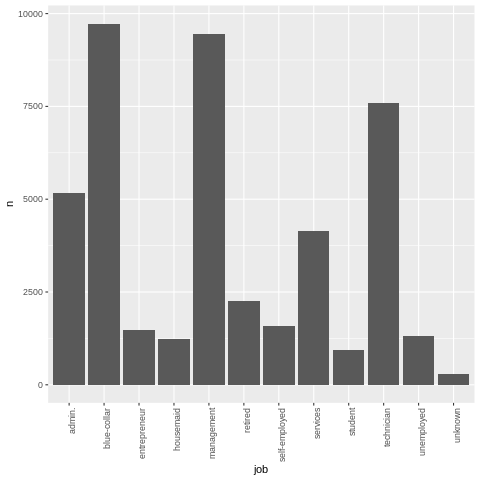

In [13]:
%%R
dataset_bank %>%                 # indicar dataset
  group_by(job)%>%               # agrupar pela coluna
  summarise(n = n())%>%          # sumarizar pela quantidade
  ggplot(aes(x = job, y = n))+   # plotar
  geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

 - Para esse estudo de caso, digamos que realmente queremos entender a profissão (job) de acordo com o uso da tecnologia em uma determinada função. 
 
 - Nesse caso, começaríamos a **classificar cada uma das profissões em nível médio, alto e baixo em termos de uso de tecnologia.**

 - Uma função que podemos usar é a **mutate do dplyr** é muito útil quando você está **reatribuindo muitos níveis diferentes** de uma variável, em vez de usar alguma função ifelse aninhada. 

-  A função **mutate()** também é muito útil ao **converter variáveis numéricas em dados categóricos.**

## Queremos adicionar o nível requerido de informática por job

Função case_when() - Quando Job for "admin", determinar nível "medio"

In [14]:
%%R
dataset_bank <- dataset_bank %>% # dataset
  mutate(technology_use =        # mutate adicionando coluna technology_use
           #de ~ para
           case_when(job == 'admin' ~ "medio",
                     job == 'blue-collar' ~ "baixo",
                     job == 'entrepreneur' ~ "alto",
                     job == 'housemaid' ~ "baixo",
                     job == 'management' ~ "medio",
                     job == 'retired' ~ "baixo",
                     job == 'self-employed' ~ "baixo",
                     job == 'services' ~ "medio",
                     job == 'student' ~ "alto",
                     job == 'technician' ~ "alto",
                     job == 'unemployed' ~ "baixo",
                     job == 'unknown' ~ "baixo"))

head(dataset_bank)
# View(dataset_bank)

  age          job marital education default balance housing loan contact day
1  58   management married  tertiary      no    2143     yes   no unknown   5
2  44   technician  single secondary      no      29     yes   no unknown   5
3  33 entrepreneur married secondary      no       2     yes  yes unknown   5
4  47  blue-collar married   unknown      no    1506     yes   no unknown   5
5  33      unknown  single   unknown      no       1      no   no unknown   5
6  35   management married  tertiary      no     231     yes   no unknown   5
  month duration campaign pdays previous poutcome  y technology_use
1   may      261        1    -1        0  unknown no          medio
2   may      151        1    -1        0  unknown no           alto
3   may       76        1    -1        0  unknown no           alto
4   may       92        1    -1        0  unknown no          baixo
5   may      198        1    -1        0  unknown no          baixo
6   may      139        1    -1        0  unkn

- Como podemos ver acima, criamos um novo campo chamado technology_use e atribuímos a cada um valor de acordo com seu uso de tecnologia. 

- Poderiamos argumentar tarefas diferentes para cada uma delas, mas para este estudo de caso é suficiente.

- Ao acrescentar uma variável podemos causar a incorrência de valores NA por não encontrar valores correspondentes.


## Revisar novo campo **$technology_use** com as proporções de conhecimento em tecnologia

In [15]:
%%R
# Agora vamos revisar rapidamente esse novo campo.
table(dataset_bank$technology_use)


 alto baixo medio 
10022 16406 13612 


## Converter a percentual o table anterior
rount(prop.table(table(

In [16]:
%%R
# Vamos colocar isso em percentual
round(prop.table(table(dataset_bank$technology_use)),2)


 alto baixo medio 
 0.25  0.41  0.34 


---

## Variáveis Dummies - conversão/representação numérica de uma variável categórica. 

- Sempre que o valor padrão for sim, codificaremos para 1 e 0 caso contrário. 

- Para duas variáveis de nível mutuamente exclusivas, isso elimina a necessidade de uma coluna adicional, pois está implícito na primeira coluna.

- A coluna default representa se um usuário passou ou não no cheque especial

- Em vez de deixar os níveis da variável como "sim" e "não" codificaremos como uma **variável fictícia (dummy).**

- As novas colunas são criadas com informações associadas às outras variáveis que já existem neste dataset.

### Representando "default" em valor Numérico na nova coluna "defaulted"

In [17]:
%%R
dataset_bank <- dataset_bank %>%    
  mutate(defaulted = ifelse(default  == "yes", 1, 0))
                     # se o valor da coluna default for "yes", atribuir 1
                     # caso contrário, atribuir 0 

head(dataset_bank)
#View(dataset_bank)

  age          job marital education default balance housing loan contact day
1  58   management married  tertiary      no    2143     yes   no unknown   5
2  44   technician  single secondary      no      29     yes   no unknown   5
3  33 entrepreneur married secondary      no       2     yes  yes unknown   5
4  47  blue-collar married   unknown      no    1506     yes   no unknown   5
5  33      unknown  single   unknown      no       1      no   no unknown   5
6  35   management married  tertiary      no     231     yes   no unknown   5
  month duration campaign pdays previous poutcome  y technology_use defaulted
1   may      261        1    -1        0  unknown no          medio         0
2   may      151        1    -1        0  unknown no           alto         0
3   may       76        1    -1        0  unknown no           alto         0
4   may       92        1    -1        0  unknown no          baixo         0
5   may      198        1    -1        0  unknown no          ba

---

##**Codificação One-Hot Enconding** 

- Falamos sobre a criação de uma única coluna como uma variável dummy, mas devemos falar sobre a codificação one-hot. 

- Uma codificação One-Hot é efetivamente a mesma coisa que fizemos no item anterior, mas para variáveis de muitos níveis em que a coluna possui 0s em todas as linhas, exceto onde o valor corresponde à nova coluna, que seria 1.



- **0000000001 - indica um valor**
- **0000000010 - indica outro valor**


In [0]:
%%R
install.packages("caret")
library(caret)

Como podemos converter a variável Color para seu correspondente numérico?

Com um Vetor One-Hot podemos representarqualquer número de possibilidades para uma única variável. Assim convertemos a variável categórica para seu correspondente numérico.


dummyVars() - Cria um conjunto de variáveis Dummies que são os correspondente One-Hot enconding das variáveis categóricas. 

##Técnica para Conversão **dataset em Numérico**

In [20]:
%%R
#?dummyVars
dmy <- dummyVars(" ~ .", # todas as variáveis explanatórias do conjunto de dados
                 data = dataset_bank) # conjunto de dados

bank.dummies <- data.frame(predict(dmy, # aplicar a variável a um novo DataFrame
                                   newdata = dataset_bank))

head(bank.dummies)
#View(bank.dummies)

  age job.admin. job.blue.collar job.entrepreneur job.housemaid job.management
1  58          0               0                0             0              1
2  44          0               0                0             0              0
3  33          0               0                1             0              0
4  47          0               1                0             0              0
5  33          0               0                0             0              0
6  35          0               0                0             0              1
  job.retired job.self.employed job.services job.student job.technician
1           0                 0            0           0              0
2           0                 0            0           0              1
3           0                 0            0           0              0
4           0                 0            0           0              0
5           0                 0            0           0              0
6           0  

# Acima

1. carregamos o pacote caret
2. executamos a função dummyVars para todas as variáveis do dataset
3. criamos um novo dataframe, com a conversão de todas as variáveis categóricas para numéricas. 


In [21]:
%%R
str(bank.dummies)
# View(dataset_bank)
# View(bank.dummies)

'data.frame':	45211 obs. of  57 variables:
 $ age                : num  58 44 33 47 33 35 28 42 58 43 ...
 $ job.admin.         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.blue.collar    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ job.entrepreneur   : num  0 0 1 0 0 0 0 1 0 0 ...
 $ job.housemaid      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.management     : num  1 0 0 0 0 1 1 0 0 0 ...
 $ job.retired        : num  0 0 0 0 0 0 0 0 1 0 ...
 $ job.self.employed  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.services       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.student        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.technician     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ job.unemployed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job.unknown        : num  0 0 0 0 1 0 0 0 0 0 ...
 $ marital.divorced   : num  0 0 0 0 0 0 0 1 0 0 ...
 $ marital.married    : num  1 0 1 1 0 1 0 0 1 0 ...
 $ marital.single     : num  0 1 0 0 1 0 1 0 0 1 ...
 $ education.primary  : num  0 0 0 0 0 0 0 0 1 0 ...
 $ education.secondary: num  0 1 1 0 0 0 0 0 0

Não incluímos todas as colunas, podemos ver que isso deixou a coluna idade (age) no formato original.


##**Combinando Recursos ou Cruzamento de Recursos**

- O cruzamento de recursos é onde **combinamos diversas variáveis.**

- Às vezes, a combinação de variáveis pode produzir um **desempenho preditivo** que executa o que eles poderiam fazer isoladamente.

- Assim, podemos fazer um agrupamento por duas variáveis por exemplo, com a devida contagem abaixo:


In [22]:
%%R
  dataset_bank %>%            #dataset
  group_by(job, marital) %>%  #agrupar/combinar o dataset por ocupação e estado civil
  summarise(n = n())          #sumarizar por total de ocorrência dessa COMBINAÇÂO

R[write to console]: `summarise()` regrouping output by 'job' (override with `.groups` argument)



# A tibble: 36 x 3
# Groups:   job [12]
   job          marital      n
   <fct>        <fct>    <int>
 1 admin.       divorced   750
 2 admin.       married   2693
 3 admin.       single    1728
 4 blue-collar  divorced   750
 5 blue-collar  married   6968
 6 blue-collar  single    2014
 7 entrepreneur divorced   179
 8 entrepreneur married   1070
 9 entrepreneur single     238
10 housemaid    divorced   184
# … with 26 more rows


R[write to console]: `summarise()` regrouping output by 'job' (override with `.groups` argument)



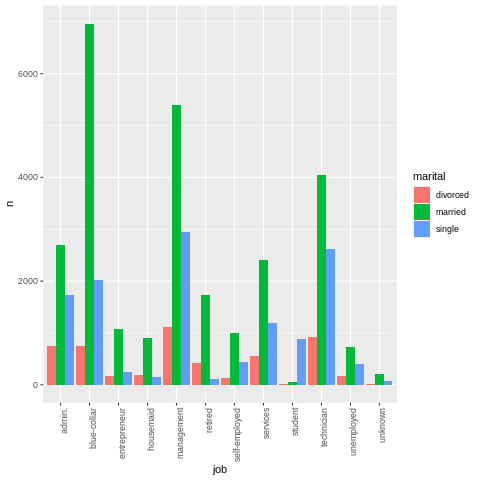

In [23]:
%%R
# Uma visualização da combinação de ocupação e estado civil
dataset_bank %>% 
  group_by(job, marital) %>%
  summarise(n = n()) %>%

  ggplot(aes(x = job, y = n, fill = marital))+
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

O nosso trabalho agora é fazer a junção, criar novas variáveis do tipo dummy que representem a informação das combinações feitas acima. 

##Representação numérica de Job *vs* Marital com dummyvars()

In [0]:
%%R
# Uma avaliação que geralmente é muito mais fácil de interpretar

# criar um novo conjunto de dados "dmy" com dummyvars

dmy <- dummyVars( ~ job:marital, # diferente de antes, indicamos apenas as duas variáveis
                 data = dataset_bank) # dataset

In [25]:
%%R
bank.cross <- predict(dmy, 
                      newdata = dataset_bank)

# View(bank.cross)
head(bank.cross)

  jobadmin.:maritaldivorced jobblue-collar:maritaldivorced
1                         0                              0
2                         0                              0
3                         0                              0
4                         0                              0
5                         0                              0
6                         0                              0
  jobentrepreneur:maritaldivorced jobhousemaid:maritaldivorced
1                               0                            0
2                               0                            0
3                               0                            0
4                               0                            0
5                               0                            0
6                               0                            0
  jobmanagement:maritaldivorced jobretired:maritaldivorced
1                             0                          0
2                           

- Devemos lembrar de que, ao combinar diversas variáveis, podemos ter alguns desses novos valores muito esparsos. 

- Revisar as saídas e se necessário aplicar alguma outra técnica mencionada anteriormente.



##**Conclusão**

- Existem muitos métodos adicionais que podem ser usados para variáveis numéricas e combinações de numérico e categórico.

- Podemos usar o **PCA**, entre outras formas, para **melhorar o poder preditivo das variáveis explicativas.**
